<a href="https://colab.research.google.com/github/shrutilalwani07/Restaurant-ranking-prediction/blob/main/Restaurant_Ranking_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/zomato.csv', nrows=393)  # Read the first 393 rows
data.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
data.isna().sum()


url                              0
address                          1
name                             1
online_order                     1
book_table                       1
rate                            36
votes                            1
phone                            5
location                         1
rest_type                        1
dish_liked                     209
cuisines                         1
approx_cost(for two people)      1
reviews_list                     1
menu_item                        1
listed_in(type)                  1
listed_in(city)                  1
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          391 non-null    object 
 1   address                      390 non-null    object 
 2   name                         390 non-null    object 
 3   online_order                 390 non-null    object 
 4   book_table                   390 non-null    object 
 5   rate                         355 non-null    object 
 6   votes                        390 non-null    float64
 7   phone                        386 non-null    object 
 8   location                     390 non-null    object 
 9   rest_type                    390 non-null    object 
 10  dish_liked                   182 non-null    object 
 11  cuisines                     390 non-null    object 
 12  approx_cost(for two people)  390 non-null    object 
 13  reviews_list        

In [ ]:
data=data[data.cuisines.isna()==False]


In [ ]:
data.isna().sum()


url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                            35
votes                            0
phone                            4
location                         0
rest_type                        0
dish_liked                     208
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 389
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          390 non-null    object 
 1   address                      390 non-null    object 
 2   name                         390 non-null    object 
 3   online_order                 390 non-null    object 
 4   book_table                   390 non-null    object 
 5   rate                         355 non-null    object 
 6   votes                        390 non-null    float64
 7   phone                        386 non-null    object 
 8   location                     390 non-null    object 
 9   rest_type                    390 non-null    object 
 10  dish_liked                   182 non-null    object 
 11  cuisines                     390 non-null    object 
 12  approx_cost(for two people)  390 non-null    object 
 13  reviews_list        

In [ ]:
data.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)


In [ ]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)


In [ ]:
data.rename(columns={'listed_in(type)': 'listed_type'}, inplace=True)


In [ ]:
data.name.value_counts().head()


Matru Sagar         2
Lassi Shop          2
Srinathji's Cafe    2
Spice Elephant      2
Coffee Tindi        2
Name: name, dtype: int64

Text(0.5, 1.0, 'Name vs Number of Restaurant')

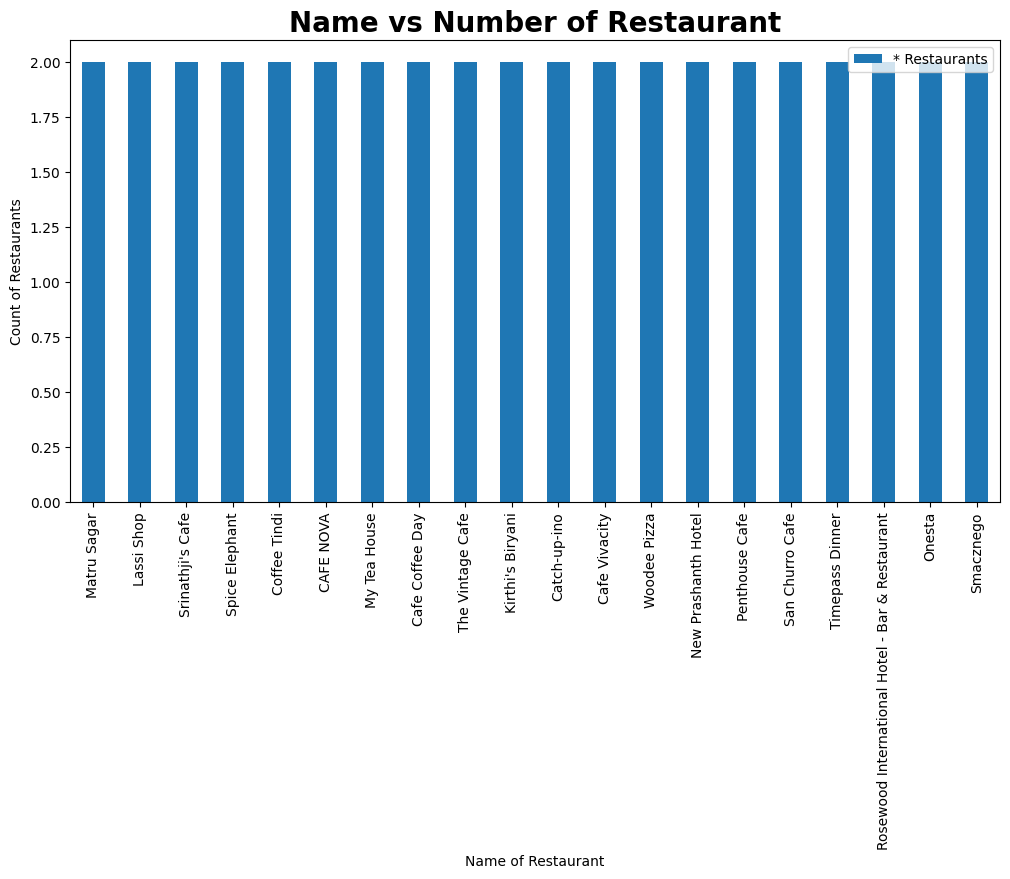

In [ ]:
plt.figure(figsize = (12,6))
ax = data.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

In [ ]:
data.online_order.value_counts()


Yes    283
No     107
Name: online_order, dtype: int64

Text(0.5, 0, 'online orders')

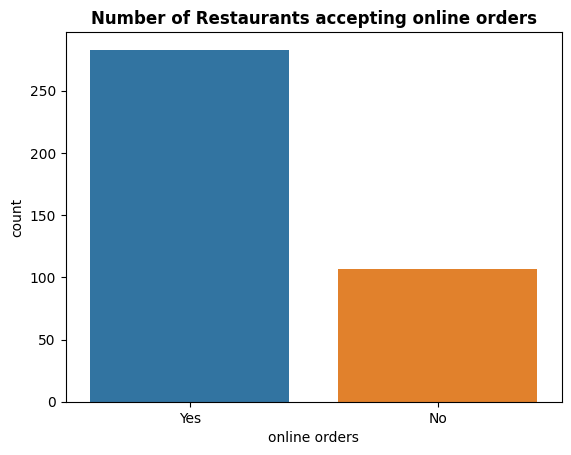

In [ ]:
ax= sns.countplot(data=data , x='online_order')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

In [ ]:
data['book_table'].value_counts()


No     369
Yes     21
Name: book_table, dtype: int64

Text(0, 0.5, 'Number of Restaurants')

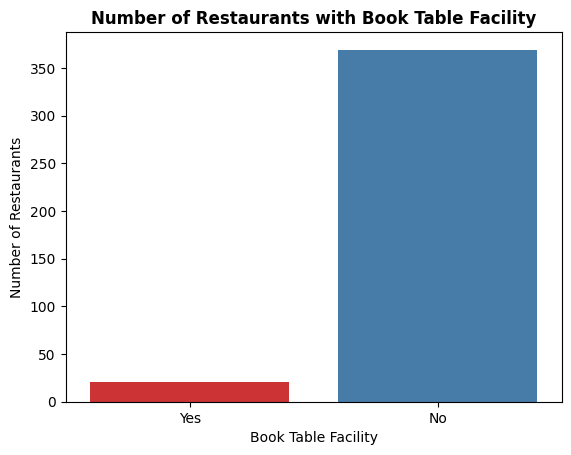

In [ ]:
ax = sns.countplot(data=data, x='book_table', palette="Set1")
plt.title("Number of Restaurants with Book Table Facility", weight='bold')
plt.xlabel('Book Table Facility')
plt.ylabel('Number of Restaurants')

In [ ]:
data['location'].value_counts()[:10]

Banashankari            197
Basavanagudi             73
Jayanagar                59
Kumaraswamy Layout       38
Mysore Road               7
Uttarahalli               7
Vijay Nagar               4
Rajarajeshwari Nagar      2
JP Nagar                  2
South Bangalore           1
Name: location, dtype: int64

Text(0.5, 1.0, 'Location')

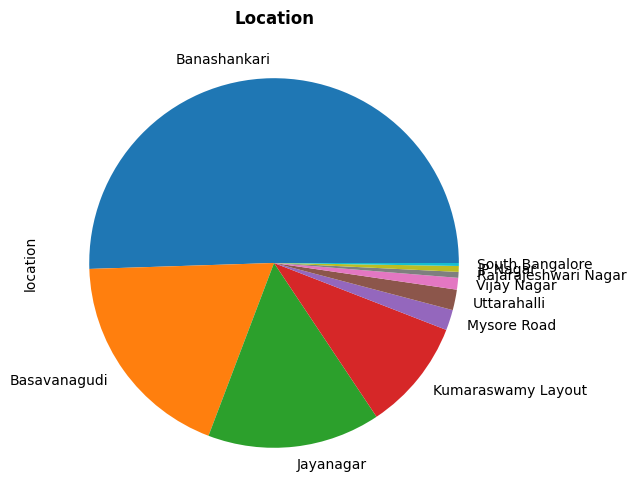

In [ ]:
plt.figure(figsize=(12,6))
data['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

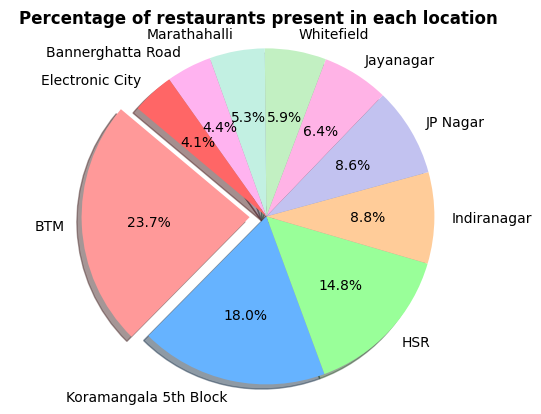

In [ ]:
values = [321, 244, 201, 119, 116, 87, 80, 72, 59, 55]
names = ['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar', 'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road', 'Electronic City']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#c2f0e2','#ffb3f0','#ff6666']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Explode the first slice

plt.pie(values, explode=explode, labels=names, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in each location", weight='bold')

# Show the pie chart
plt.show()


Text(0.5, 1.0, 'Location vs Count')

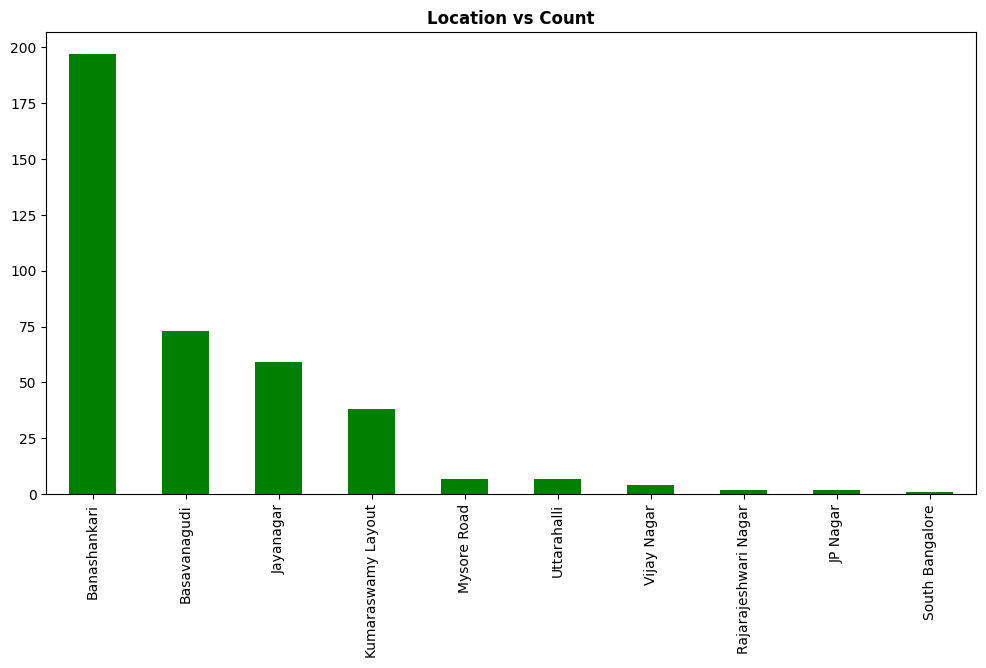

In [ ]:
plt.figure(figsize = (12,6))
data['location'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')


In [ ]:
data['location'].nunique()


10

In [ ]:
data['rest_type'].value_counts().head(10)


Quick Bites           175
Casual Dining          76
Cafe                   39
Dessert Parlor         20
Takeaway, Delivery     13
Delivery               11
Beverage Shop          10
Bakery                  8
Sweet Shop              5
Bar                     4
Name: rest_type, dtype: int64

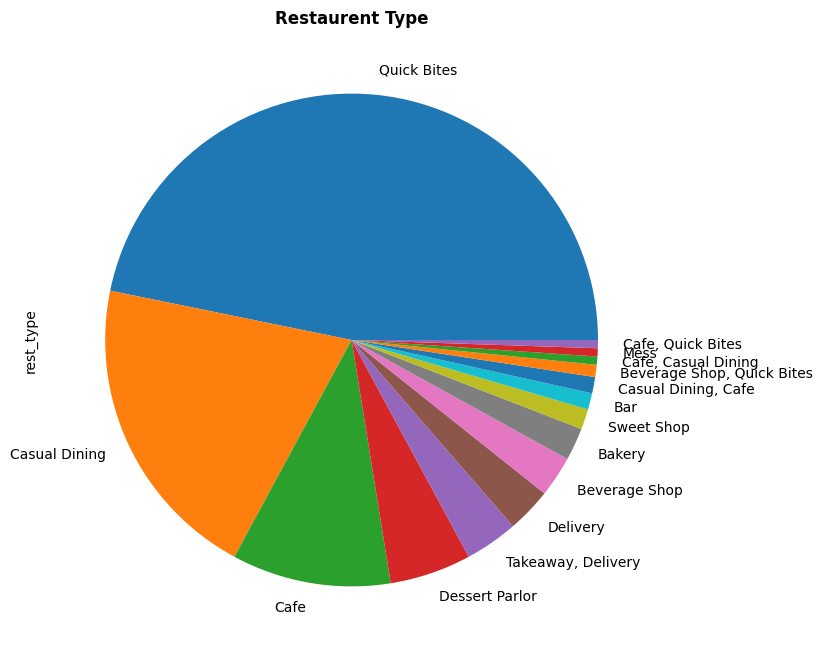

In [ ]:
plt.figure(figsize = (14,8))
data.rest_type.value_counts()[:15].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')
plt.show()

In [ ]:
colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']


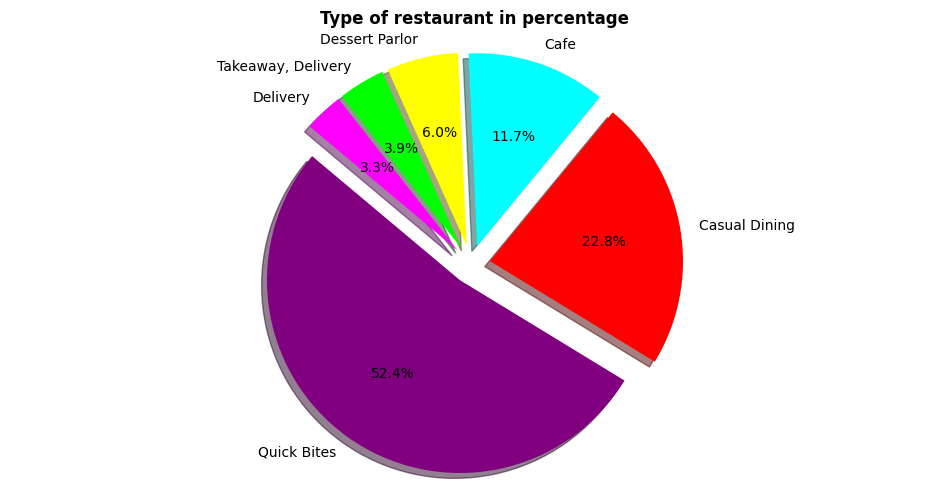

In [ ]:
plt.figure(figsize = (12,6))
names = data['rest_type'].value_counts()[:6].index
values = data['rest_type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Type of restaurant in percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


In [ ]:
data['average_cost'].value_counts()[:20]


300      57
200      48
400      46
500      31
150      31
250      27
600      24
100      22
800      21
700      15
450      12
350      12
650      11
750       8
550       8
1,200     5
900       4
850       3
1,000     2
950       1
Name: average_cost, dtype: int64

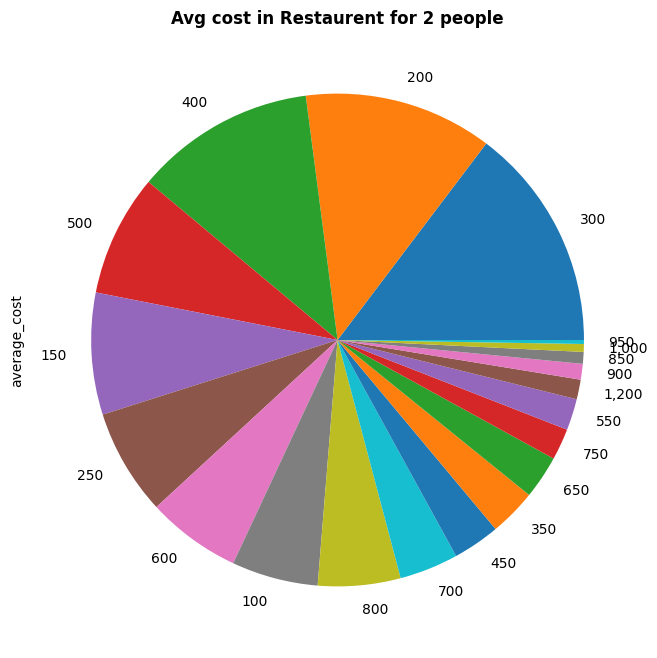

In [ ]:
plt.figure(figsize = (12,8))
data['average_cost'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()

In [ ]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")


Text(0.5, 1.0, 'Average cost for 2 people in Rupees')

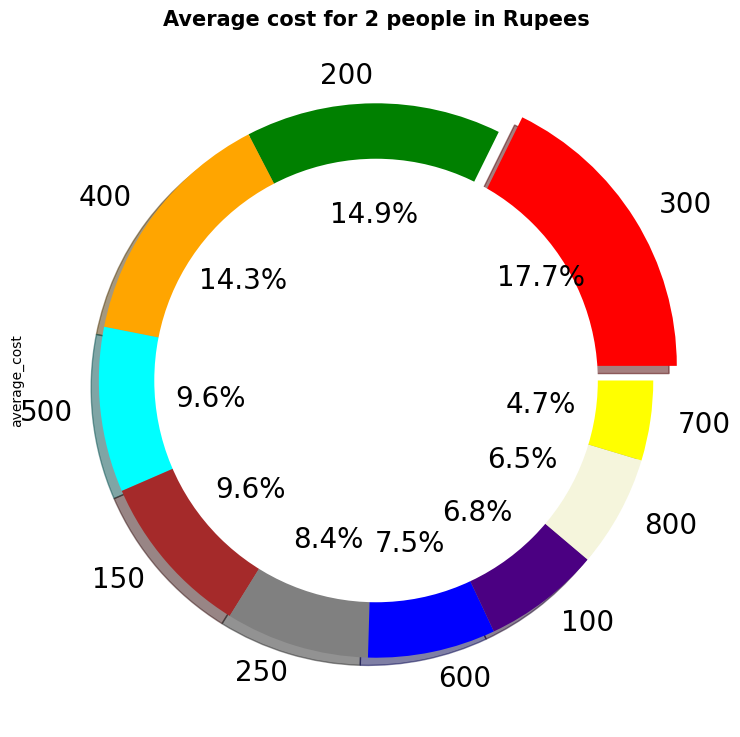

In [ ]:
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)

delplot = data['average_cost'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')


In [ ]:
dishes_data = data[data.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())


In [ ]:
dishes_data.isnull().sum()


name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
average_cost    0
reviews_list    0
menu_item       0
listed_type     0
dtype: int64

In [ ]:
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)


Text(0, 0.5, 'Count')

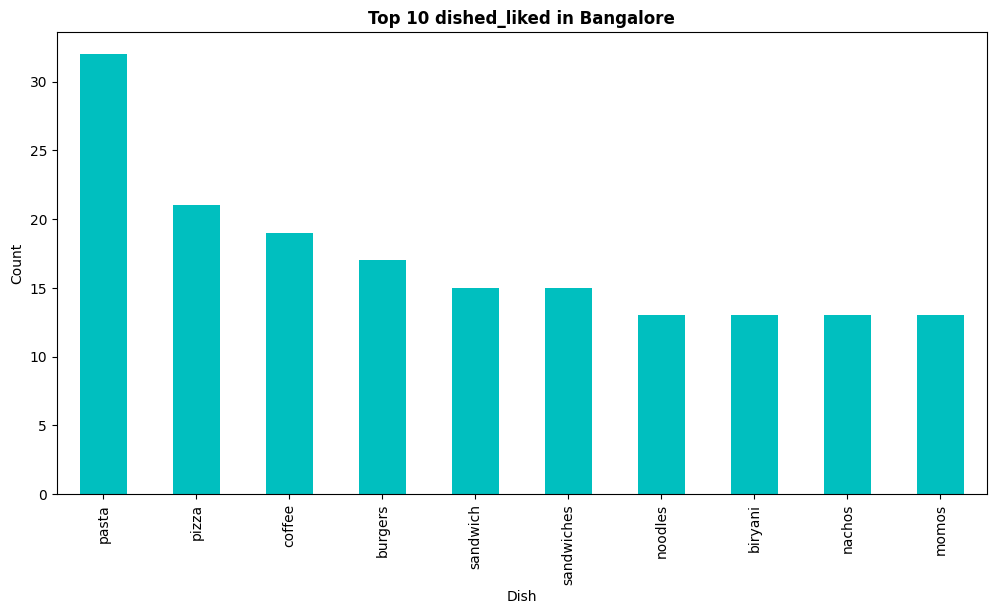

In [ ]:
plt.figure(figsize=(12,6))
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')


In [ ]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)


In [ ]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))


3.8357142857142854


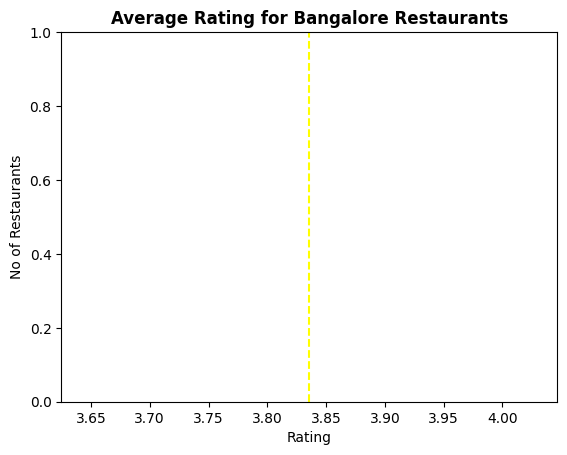

In [ ]:
plt.axvline(x= data.rate.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.rate.mean())


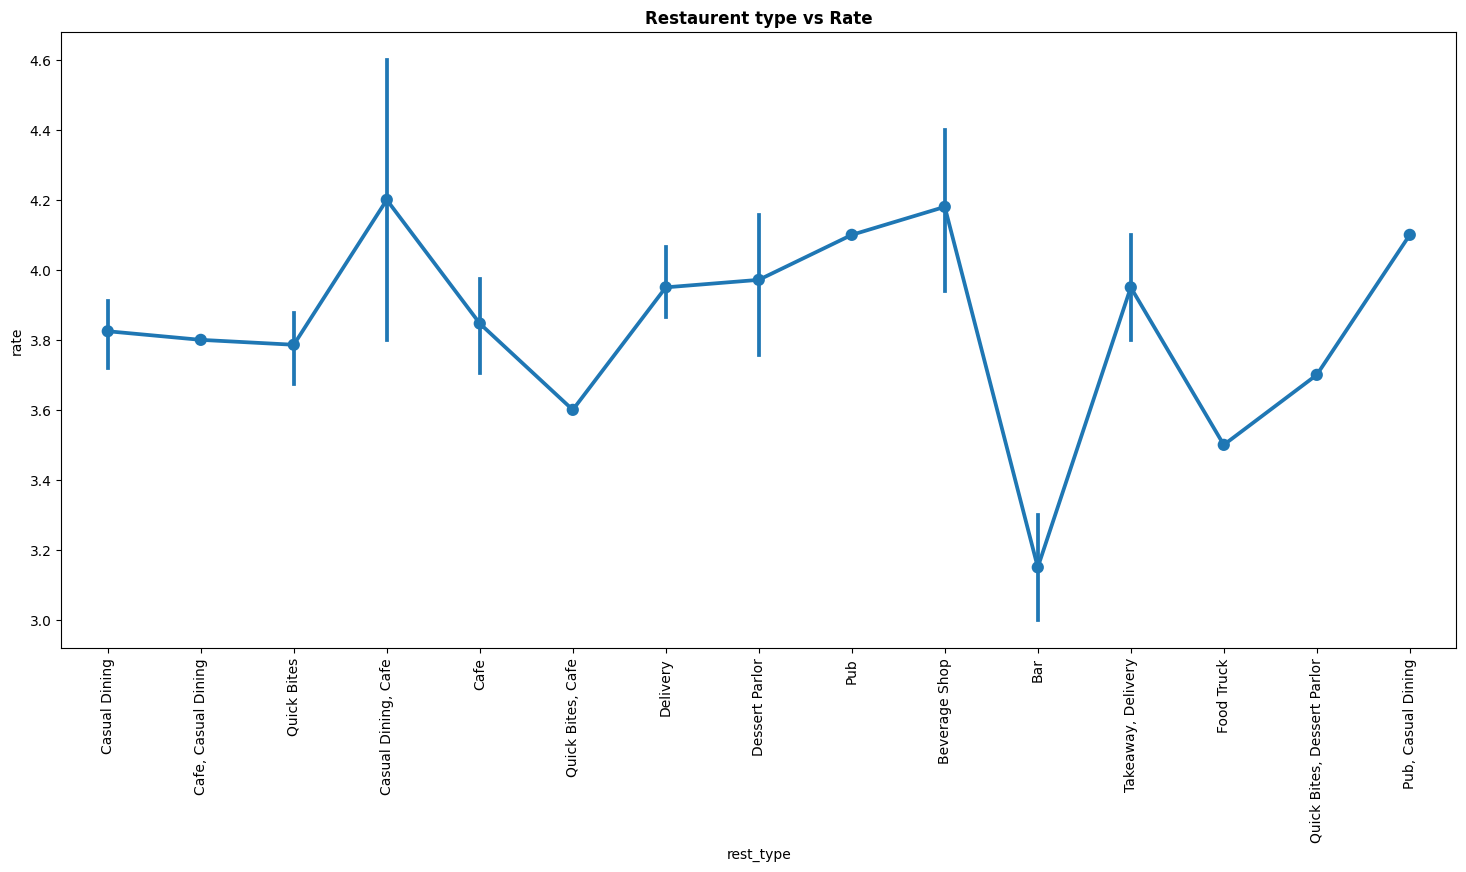

In [ ]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()


In [ ]:
cuisines_data = data[data.cuisines.notnull()] # remove null values
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())


In [ ]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)


Text(0, 0.5, 'No of restaurants')

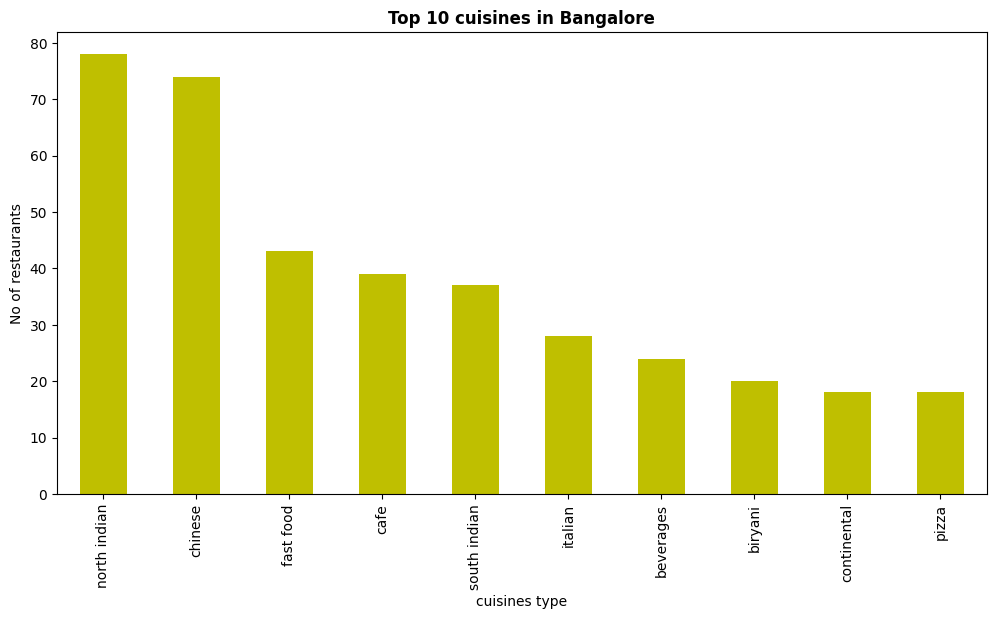

In [ ]:
plt.figure(figsize=(12,6))
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'y')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')


Text(0.5, 1.0, 'rate vs oline order')

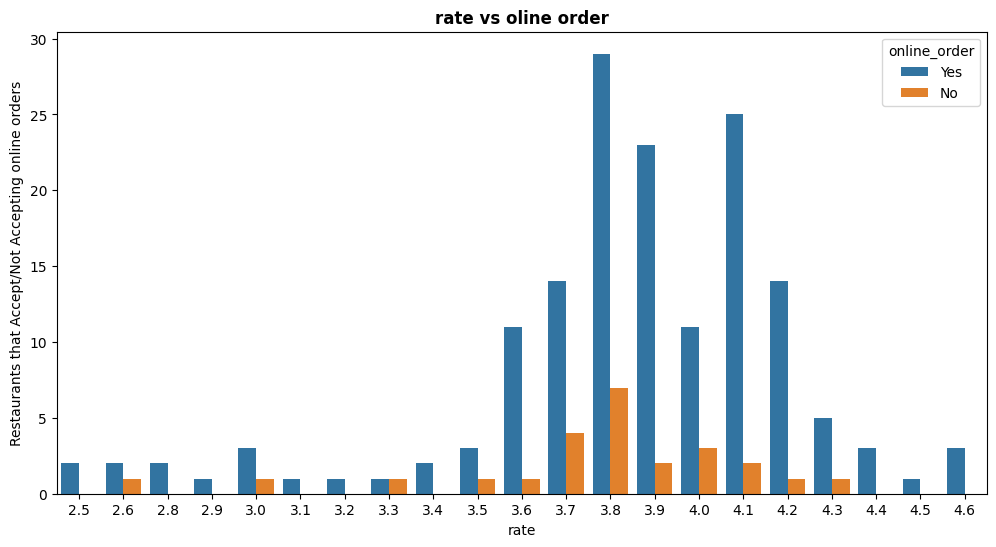

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')


In [ ]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type
0,Jalsa,1,1,4.1,775.0,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,1,0,4.1,787.0,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,1,0,3.8,918.0,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88.0,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,0,0,3.8,166.0,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Curry Leaves,1,0,4.1,176.0,Basavanagudi,Casual Dining,"Brownie, Mojito, Prawn Ghee Roast, Corn Tikki,...","Andhra, North Indian, Chinese",800,"[('Rated 5.0', 'RATED\n Curry leaves is an mu...",[],Delivery
359,Magic Meals,1,0,3.7,47.0,Jayanagar,"Quick Bites, Dessert Parlor","Biryani, Thick Shakes, Fries","Fast Food, Desserts, Beverages",400,"[('Rated 5.0', 'RATED\n Best homely taste,\nG...",[],Delivery
360,Desi Cream Junction,1,1,3.7,36.0,Jayanagar,Casual Dining,Vegetarian,"Chinese, North Indian, Pizza, Italian",650,"[('Rated 4.0', 'RATED\n Visited this placed b...",[],Delivery
374,Eat Repeat,1,0,3.9,101.0,Basavanagudi,Quick Bites,"Sweet Pongal, Curd Rice",South Indian,150,"[('Rated 4.0', 'RATED\n This is a no-frills p...",[],Delivery


In [ ]:
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_type'], inplace  =True)


In [ ]:
data['rest_type'] = data['rest_type'].str.replace(',' , '')
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()


Casual Dining         61
Bites Quick           57
Cafe                  30
Dessert Parlor         7
Cafe Casual Dining     6
Name: rest_type, dtype: int64

In [ ]:
data['cuisines'] = data['cuisines'].str.replace(',' , '')
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()


Indian South                         8
Chinese Indian North                 8
Chinese Indian Indian North South    7
Indian North                         5
Fast Food Food Street                4
Name: cuisines, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()
data['location'] = T.fit_transform(data['location'])
data['rest_type'] = T.fit_transform(data['rest_type'])
data['cuisines'] = T.fit_transform(data['cuisines'])


In [ ]:
data["average_cost"] = data["average_cost"].str.replace(',' , '')


In [ ]:
data["average_cost"] = data["average_cost"].astype('float')


In [ ]:
data.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775.0,0,7,81,800.0
1,Spice Elephant,1,0,4.1,787.0,0,7,85,800.0
2,San Churro Cafe,1,0,3.8,918.0,0,6,63,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88.0,0,4,107,300.0
4,Grand Village,0,0,3.8,166.0,1,7,113,600.0


In [ ]:
x = data.drop(['rate','name'],axis = 1)


In [ ]:
y = data['rate']


In [ ]:
x.shape


(182, 7)

In [ ]:
y.shape


(182,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 375
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          182 non-null    object 
 1   online_order  182 non-null    uint8  
 2   book_table    182 non-null    uint8  
 3   rate          182 non-null    float64
 4   votes         182 non-null    float64
 5   location      182 non-null    int64  
 6   rest_type     182 non-null    int64  
 7   cuisines      182 non-null    int64  
 8   average_cost  182 non-null    float64
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 11.7+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])


In [ ]:
data.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,0.697121,0.655577,-0.817098,0.588742,0.448941,1.052723
1,Spice Elephant,1,0,0.697121,0.675366,-0.817098,0.588742,0.567186,1.052723
2,San Churro Cafe,1,0,-0.094206,0.891388,-0.817098,0.136628,-0.083161,1.052723
3,Addhuri Udupi Bhojana,0,0,-0.357981,-0.477302,-0.817098,-0.767601,1.217533,-0.957723
4,Grand Village,0,0,-0.094206,-0.348678,-0.080901,0.588742,1.394901,0.248544


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
lr.score(X_test, y_test)*100


-1.4446503313649162

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))


Mean Absolute Error: 0.30318540805651906
Mean Squared Error: 0.1903661845882224
Root Mean Squared Error: 0.4363097346933969


In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)


In [ ]:
rfr.score(X_test,y_test)*100


12.384345659789808

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))


Mean Absolute Error: 0.27724324324324284
Mean Squared Error: 0.16441535135135132
Root Mean Squared Error: 0.40548162887034883


In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)


In [ ]:
rdg.score(X_test,y_test)*100


-0.04079153240781341

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rdg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rdg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rdg)))


Mean Absolute Error: 0.2990148989666001
Mean Squared Error: 0.1877317702313774
Root Mean Squared Error: 0.4332802444508374


In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)


In [ ]:
ls.score(X_test,y_test)*100


4.769308826961116

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))


Mean Absolute Error: 0.2745198651093252
Mean Squared Error: 0.17870536568556383
Root Mean Squared Error: 0.42273557418978097


In [ ]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)


In [ ]:
sv.score(X_test,y_test)*100

6.8884775133491

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_sv))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_sv))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sv)))


Mean Absolute Error: 0.2645089958562206
Mean Squared Error: 0.17472863496581897
Root Mean Squared Error: 0.41800554418071895


In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_pred_knn=knn.predict(X_test) #make prediction on test set


In [ ]:
knn.score(X_test,y_test)*100


-0.1621253405994949

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))


Mean Absolute Error: 0.28216216216216233
Mean Squared Error: 0.18795945945945955
Root Mean Squared Error: 0.43354291536070516


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
nb = BayesianRidge()
nb.fit(X_train, y_train)


BayesianRidge()

In [ ]:
nb.score(X_test,y_test)*100


4.229935515600147

In [ ]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_nb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_nb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_nb)))



Mean Absolute Error: 0.2760331166658134
Mean Squared Error: 0.17971752787467
Root Mean Squared Error: 0.42393104141436727


In [ ]:
onehot = pd.read_csv("/content/zomato.csv")
onehot.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
onehot['rate'] = onehot['rate'].replace('NEW',np.NaN)
onehot['rate'] = onehot['rate'].replace('-',np.NaN)
onehot.dropna(how = 'any', inplace = True)

onehot['rate'] = onehot.loc[:,'rate'].replace('[ ]','',regex = True)
onehot['rate'] = onehot['rate'].astype(str)
onehot['rate'] = onehot['rate'].apply(lambda r: r.replace('/5',''))
onehot['rate'] = onehot['rate'].apply(lambda r: float(r))


In [ ]:
onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '')
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['cuisines'].unique()


array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', 'Indian Indian North South',
       'Indian North Rajasthani', 'Indian North', 'Cafe Italian Pizza',
       'Cafe Continental Italian', 'Beverages Cafe Italian Mexican Momos',
       'Cafe', 'Cafe Chinese Continental Italian', 'Cafe Continental',
       'Cafe Chinese Continental Fast Food Momos', 'Cafe Chinese Italian',
       'American Cafe Italian', 'Cafe French Indian North',
       'Beverages Cafe Fast Food Pizza',
       'Cafe European Fast Food Italian',
       'Cafe Chinese Fast Food Indian North', 'Cafe Italian',
       'Burger Chinese Fast Food Indian North', 'Pizza',
       'Biryani Fast Food Indian North', 'Biryani', 'Chinese Momos Thai',
       'Chinese Indian Indian Mughlai North South',
       'Fast Food Food Street', 'Burger Fast Food', 'Fast Food Pizza',
       'Continental Indian Italian North', 'Chinese Indian North',
       'Biryani Chinese Indian North Rolls', 'Chinese

In [ ]:
my_array = np.array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ...,
       'BBQ Continental Indian Italian North', 'Nepalese Tibetan',
       'Andhra Biryani Hyderabadi'])
# Display the array
print(my_array)


['Chinese Indian Mughlai North' 'Chinese Indian North Thai'
 'Cafe Italian Mexican' Ellipsis 'BBQ Continental Indian Italian North'
 'Nepalese Tibetan' 'Andhra Biryani Hyderabadi']


In [ ]:
onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '')
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()


Casual Dining         61
Bites Quick           57
Cafe                  30
Dessert Parlor         7
Cafe Casual Dining     6
Name: rest_type, dtype: int64

In [ ]:
onehot['dish_liked'] = onehot['dish_liked'].str.replace(',' , '')
onehot['dish_liked'] = onehot['dish_liked'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['dish_liked'].value_counts().head()


Dosa Masala                                                                                       3
Biryani                                                                                           3
Burgers Caramel Coffee Iced Iced Milkshake Tea                                                    2
Biryani Biryani Buffet Chicken Chocolate Curry Dum Green Lunch Momos Nirvana Paneer Thai Tikka    2
Burgers French Fries                                                                              2
Name: dish_liked, dtype: int64

In [ ]:
dummy_rest_type=pd.get_dummies(onehot['rest_type'])
dummy_city=pd.get_dummies(onehot['location'])
dummy_cuisines=pd.get_dummies(onehot['cuisines'])
dummy_dishliked=pd.get_dummies(onehot['dish_liked'])


In [ ]:
final=pd.concat([onehot,dummy_rest_type,dummy_city,dummy_cuisines,dummy_dishliked],axis=1)


In [ ]:
final.drop(columns=['rest_type','location','cuisines','dish_liked','name','phone'] , inplace=True)
final.drop(columns=['reviews_list','menu_item','listed_in(type)','listed_in(city)'], inplace=True)
final.drop(columns=['url','address'], inplace=True)


In [ ]:
final = pd.DataFrame({'online_order': ['Yes', 'No', 'Yes', 'No'],
                      'book_table': ['Yes', 'No', 'No', 'Yes']})
final = pd.get_dummies(final, columns=['online_order', 'book_table'], drop_first=True)
print(final)


   online_order_Yes  book_table_Yes
0                 1               1
1                 0               0
2                 1               0
3                 0               1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
lr.score(X_test,y_test)*100


-1.4446503313649162

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))


Mean Absolute Error: 0.30318540805651906
Mean Squared Error: 0.1903661845882224
Root Mean Squared Error: 0.4363097346933969


In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)


In [ ]:
  rdg.score(X_test,y_test)*100


-0.04079153240781341

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rdg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rdg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rdg)))


Mean Absolute Error: 0.2990148989666001
Mean Squared Error: 0.1877317702313774
Root Mean Squared Error: 0.4332802444508374


In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)


In [ ]:
rfr.score(X_test,y_test)*100


14.13038847800696

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))


Mean Absolute Error: 0.27345945945945904
Mean Squared Error: 0.16113881081081088
Root Mean Squared Error: 0.4014209894995663


In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)


In [ ]:
ls.score(X_test,y_test)*100


4.769308826961116

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))


Mean Absolute Error: 0.2745198651093252
Mean Squared Error: 0.17870536568556383
Root Mean Squared Error: 0.42273557418978097


In [ ]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred


,actual,pred
61,3.6,3.748
40,3.8,3.910
357,4.1,3.426
375,4.1,3.993
9,4.2,4.017
18,3.9,3.398
205,3.5,3.842
310,3.9,3.778
265,2.5,3.827
15,3.8,3.708


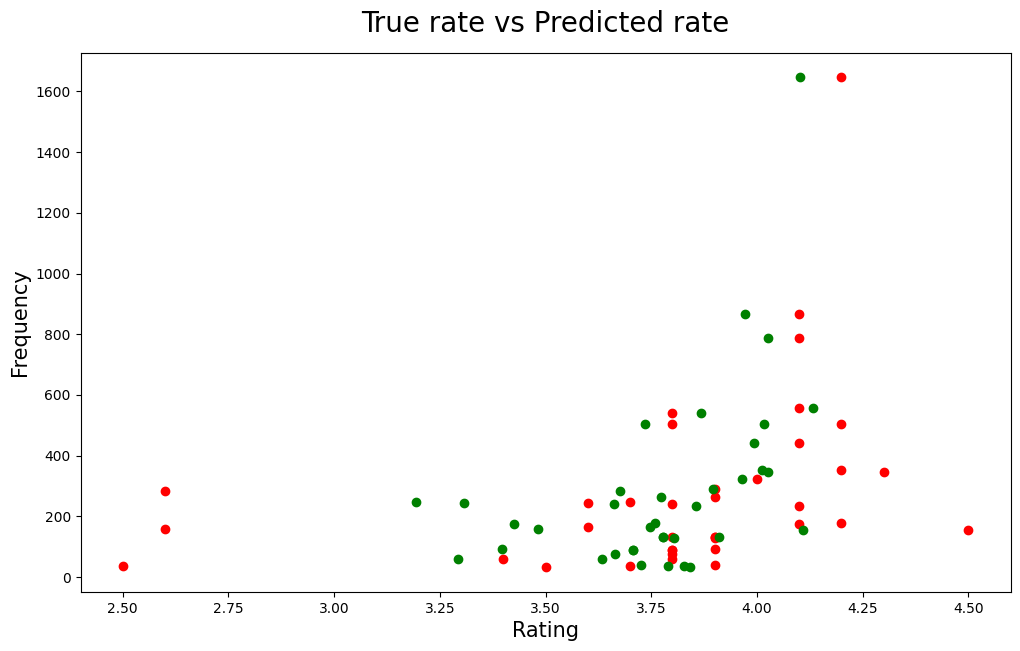

In [ ]:
plt.figure(figsize=(12,7))
preds_rf = rfr.predict(X_test)
plt.scatter(y_test,X_test.iloc[:,2],color="red")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,X_test.iloc[:,2],color="green")
